In [185]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

base = pd.read_csv('../data/DATAthon 팀 프로젝트/Base.csv')
base_copy = base.copy()

var1 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant I.csv')
var1_copy = var1.copy()

var2 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant II.csv')
var2_copy = var2.copy()

var3 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant III.csv')
var3_copy = var3.copy()

var4 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant IV.csv')
var4_copy = var4.copy()

var5 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant V.csv')
var5_copy = var5.copy()

In [186]:
def EDA_dataset(df):
    drop_col = ['payment_type', 'employment_status', 'prev_address_months_count', 'intended_balcon_amount', 'housing_status', 'days_since_request']
    df.drop(columns = drop_col, inplace = True)

    df = df[df['current_address_months_count'] >= 0]

    df['bank_months_count'].replace({-1: 0}, inplace = True)

    df = df[df['session_length_in_minutes'] >= 0]

    df['proposed_credit_limit'] = df['proposed_credit_limit'].astype(int)


    return df


In [187]:
base_df_copy = EDA_dataset(base_copy)
var1_copy = EDA_dataset(var1_copy)
var2_copy = EDA_dataset(var2_copy)
var3_copy = EDA_dataset(var3_copy)
var4_copy = EDA_dataset(var4_copy)
var5_copy = EDA_dataset(var5_copy)

In [188]:
base_copy

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,25,40,1059,13096.035018,7850.955007,6742.080561,5,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,89,20,1658,9223.283431,5745.251481,5941.664859,3,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,14,40,1095,4471.472149,5471.988958,5992.555113,15,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,14,30,3483,14431.993621,6755.344479,5970.336831,11,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,29,40,2339,7601.511579,5124.046930,5940.734212,1,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,143,30,530,6732.602414,3010.048099,3095.754245,42,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,193,30,408,1574.293294,2716.495767,4286.089050,0,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,202,10,749,1258.864938,3601.322892,3103.891664,2,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,3,30,707,7048.137128,6521.395012,3068.265084,7,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [189]:
def one_hot(df):
    object_cols = ['source', 'device_os']
    df = pd.get_dummies(df, columns=object_cols, drop_first=True, dtype=int)

    return df


In [190]:
base_copy = one_hot(base_copy)
var1_copy = one_hot(var1_copy)  
var2_copy = one_hot(var2_copy)
var3_copy = one_hot(var3_copy)
var4_copy = one_hot(var4_copy)
var5_copy = one_hot(var5_copy)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(df):
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 0), 'group'] = 0
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 1), 'group'] = 1
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 0), 'group'] = 2
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 1), 'group'] = 3
    df['group'] = df['group'].astype(int)

    X = df.drop(columns=['group'])
    y = df['group']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    return X_train, X_test, y_train, y_test




In [ ]:
base_sam, X_test, y_train, y_test = split_data(base_copy)
var1_sam, X_test, y_train, y_test = split_data(var1_copy)
var2_sam, X_test, y_train, y_test = split_data(var2_copy)
var3_sam, X_test, y_train, y_test = split_data(var3_copy)
var4_sam, X_test, y_train, y_test = split_data(var4_copy)
var5_sam, X_test, y_train, y_test = split_data(var5_copy)

In [ ]:
base_df_copy['device_fraud_count'].sum()

0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# df = [base_copy, var1_copy, var2_copy, var3_copy, var4_copy, var5_copy]
# for df in df:
#     correlation_matrix = df.corr(numeric_only=True)
#     plt.figure(figsize=(35, 35))
#     sns.heatmap(
#         correlation_matrix,  
#         annot=True,          
#         cmap='coolwarm',     
#         fmt=".2f",          
#         linewidths=.5,      
#         cbar=True           
#     )
#     plt.title('Correlation Matrix Heatmap')
#     plt.show()


In [ ]:
#### Distribution of All Columns ###
# import matplotlib.pyplot as plt
# import seaborn as sns
# num_cols = len(base_copy.columns)
# x = 4
# y = (num_cols + x - 1) // x 
# plt.figure(figsize=(x * 5, y * 4))
# for i, col in enumerate(base_copy.columns):
#     plt.subplot(y, x, i + 1)

#     if base_copy[col].nunique() < 5 and base_copy[col].dtype == 'int64':
#             sns.countplot(x=col, data=base_copy)
#             plt.xlabel(col, fontsize=10)
#             plt.ylabel('Count', fontsize=10)

#     else:
#         sns.histplot(base_copy[col], kde=True, bins=30)
#         plt.xlabel(col, fontsize=10)
#         plt.ylabel('Frequency', fontsize=10)

# plt.tight_layout()
# plt.suptitle('All Columns Distribution', y=1.02, fontsize=18) 
# plt.show()

In [ ]:
!pip install scikit-optimize
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    roc_curve
)
from skopt import gp_minimize
from skopt import space
from skopt.space import Integer, Real

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np



In [ ]:
#%%
## data splitting for modeling
def split_train_test(df):
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 0), 'group'] = 0
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 1), 'group'] = 1
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 0), 'group'] = 2
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 1), 'group'] = 3
    df['group'] = df['group'].astype(int)
    X = df.drop(columns=['fraud_bool', 'group'])
    y = df['fraud_bool']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['group'])
    
    return X_train, X_test, y_train, y_test

In [ ]:
x_train_base, x_test_base, y_train_base, y_test_base = split_train_test(base_sam)
x_train_var1, x_test_var1, y_train_var1, y_test_var1 = split_train_test(var1_sam)
x_train_var2, x_test_var2, y_train_var2, y_test_var2 = split_train_test(var2_sam)
x_train_var3, x_test_var3, y_train_var3, y_test_var3 = split_train_test(var3_sam)
x_train_var4, x_test_var4, y_train_var4, y_test_var4 = split_train_test(var4_sam)
x_train_var5, x_test_var5, y_train_var5, y_test_var5 = split_train_test(var5_sam)

In [ ]:
# %%
RF = RandomForestClassifier()
XGB = XGBClassifier()
LGB = LGBMClassifier()
CB = CatBoostClassifier()
GB = GradientBoostingClassifier()



In [ ]:
# %%
from sklearn.model_selection import KFold

def k_fold_training(model, X_train, y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    
    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        auc_scores.append(roc_auc_score(y_val, y_val_proba))

    return auc_scores

In [ ]:
space = [
    Integer(100, 1000, name='n_estimators'), # 트리의 개수
    Real(0.01, 0.2, name='learning_rate', prior='log-uniform'), # 학습률 (로그 스케일이 유리)
    Integer(3, 10, name='max_depth'), # 트리의 최대 깊이
    Real(0.5, 1.0, name='subsample'), # 샘플링 비율 (각 트리마다 사용될 데이터 샘플의 비율)
    Real(0.5, 1.0, name='colsample_bytree'), # 각 트리에 사용할 특성(컬럼) 비율
    Real(1e-9, 10.0, name='reg_alpha', prior='log-uniform'), # L1 정규화
    Real(1e-9, 10.0, name='reg_lambda', prior='log-uniform') # L2 정규화
]

param_names = [
        "n_estimators",
        "learning_rate",
        "max_depth",
        "subsample",
        "colsample_bytree",
        "reg_alpha",
        "reg_lambda"
    ]

datasets = {
    'base':  (x_train_base,  x_test_base,  y_train_base,  y_test_base),
    'var1':  (x_train_var1,  x_test_var1,  y_train_var1,  y_test_var1),
    'var2':  (x_train_var2,  x_test_var2,  y_train_var2,  y_test_var2),
    'var3':  (x_train_var3,  x_test_var3,  y_train_var3,  y_test_var3),
    'var4':  (x_train_var4,  x_test_var4,  y_train_var4,  y_test_var4),
    'var5':  (x_train_var5,  x_test_var5,  y_train_var5,  y_test_var5)
}




Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 24.3344
Function value obtained: -0.8449
Current minimum: -0.8449
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 13.1908
Function value obtained: -0.8580
Current minimum: -0.8580
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 25.4743
Function value obtained: -0.8160
Current minimum: -0.8580
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.6950
Function value obtained: -0.8409
Current minimum: -0.8580
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 15.2626
Function value obtained: -0.8228
Current minimum: -0.8580
Iteration No: 6 start

In [ ]:
results = {}

#%% [각 데이터셋별로 Bayesian Optimization → 학습 → 평가 반복]
for name, (X_tr, X_te, y_tr, y_te) in datasets.items():
    print(f"\n==== Processing dataset: {name} ====")
    
    def objective(params, X_train=X_tr, y_train=y_tr):
        # 파라미터 리스트를 dict로 변환
        param_dict = dict(zip(param_names, params))
        
        # XGBClassifier 인스턴스 생성
        model = XGBClassifier(
            **param_dict,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )
        
        # CV AUC 점수를 음수로 반환(최소화 하도록)
        auc_scores = k_fold_training(model, X_train, y_train)
        return -np.mean(auc_scores)
    
    #  gp_minimize 호출
    res = gp_minimize(
        func=objective,
        dimensions=space,
        n_calls=50,
        n_random_starts=10,
        random_state=42,
        verbose=False
    )
    
    # 최적 하이퍼파라미터 → dict로 변환
    best_params = dict(zip(param_names, res.x))
    print("  최적의 하이퍼파라미터:", best_params)
    print(f"  CV AUC (평균): {-res.fun:.4f}")

In [ ]:
# 4) 최적 파라미터로 최종 모델 학습
final_best_xgb_model = XGBClassifier(
        **best_params,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )


In [ ]:
#%%
# 최적의 하이퍼파라미터로 모델 학습
final_best_xgb_model.fit(X_tr, y_tr)
# test_y, pred_y를 활용한 지표 적용
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
# 베이지안 최적화된 모델로 예측
y_pred_label = final_best_xgb_model.predict(X_te)
y_pred_proba = final_best_xgb_model.predict_proba(X_te)[:, 1]

auc_score   = roc_auc_score(y_te, y_pred_proba)
conf_mat    = confusion_matrix(y_te, y_pred_label)
acc = accuracy_score(y_te, y_pred_label)
prec = precision_score(y_te, y_pred_label)
rec = recall_score(y_te, y_pred_label)
fpr, tpr, _ = roc_curve(y_te, y_pred_proba)
    
results[name] = {
        'best_params': best_params,
        'cv_auc':      -res.fun,
        'test_auc':    auc_score,
        'confusion':   conf_mat,
        'accuracy':    acc,
        'precision':   prec,
        'recall':      rec,
        'fpr':         fpr,
        'tpr':         tpr
    }

print(f"  테스트 AUC: {auc_score:.4f}, 정확도: {acc:.4f}, 정밀도: {prec:.4f}, 재현율: {rec:.4f}")

================= confusion matrix ====================
[[19778     1]
 [  218     3]]
정확도:0.98905, 정밀도:0.75, 재현율:0.013574660633484163
베이지안 최적화된 모델의 최종 테스트 AUC: 0.8711


auc:0.8710721801700648
베이지안 최적화된 모델의 최종 테스트 AUC: 0.8711


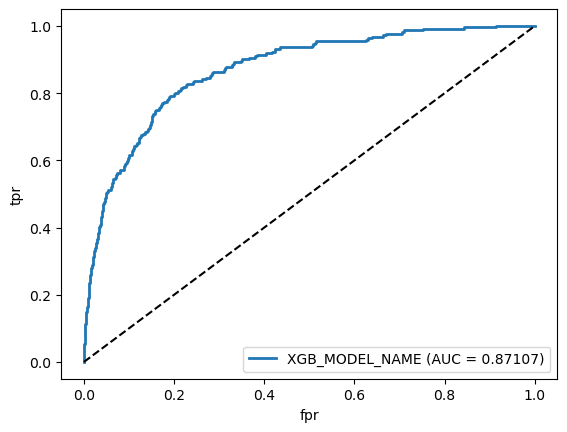

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
#%% [ROC Curve 통합 시각화]
plt.figure(figsize=(8, 6))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC={res['test_auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Variants별 ROC Curve 비교")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()